<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave_spacy_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, silhouette_samples,adjusted_rand_score, homogeneity_score, completeness_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import KernelPCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='ix')
train['lemmatized_text'] = train['lemmatized_text'].fillna('')
train['lemmatized_text'] = train['lemmatized_text'].astype(str)

In [4]:
train.head()

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
ix,,,,,,,,,,,
0,There is manuscript evidence that Austen conti...,there be manuscript evidence that austen conti...,8.236551,5.809310,3.57,12.12,2.495517,1.33,4.57,37.0,1
1,"In a remarkable comparative analysis , Mandaea...",in a remarkable comparative analysis mandaean ...,12.320171,7.499286,2.89,11.94,2.251429,1.46,3.77,21.0,1
2,"Before Persephone was released to Hermes , who...",before persephone be release to hermes who hav...,6.594628,5.231351,2.78,11.17,2.537222,1.43,4.86,42.0,1
3,Cogeneration plants are commonly found in dist...,cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.429643,1.52,4.93,32.0,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",geneva lrb rrb be the secondmostpopulous city ...,9.847729,5.455000,3.69,12.62,2.399333,1.43,4.79,28.0,1


In [8]:
#!python -m spacy download en_core_web_lg

In [6]:
import spacy
nlp = spacy.load("en_core_web_lg")


In [7]:
train['embedding'] =  (train['lemmatized_text']
                           .apply(lambda doc: nlp(doc).vector))

# X = pd.DataFrame([x for x in sample_df['embedding']])

In [9]:
X = pd.DataFrame([x for x in train['embedding']])

In [15]:
train.columns

Index(['original_text', 'lemmatized_text', 'd_chall_score', 'aoa_mean',
       'aoa_min', 'aoa_max', 'conc_rating_mean', 'conc_rating_min',
       'conc_rating_max', 'num_lemmas', 'label', 'embedding'],
      dtype='object')

In [19]:
test = pd.read_csv('drive/Shareddrives/Milestone 2/Testing_set.csv', 
                      sep='\t',index_col='ix')
test['lemmatized_text'] = test['lemmatized_text'].fillna('')
test['lemmatized_text'] = test['lemmatized_text'].astype(str)
test['embedding'] =  (test['lemmatized_text']
                           .apply(lambda doc: nlp(doc).vector))

In [22]:
new_df = pd.concat([train, test])

In [23]:
new_df

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label,embedding
ix,,,,,,,,,,,,
0,There is manuscript evidence that Austen conti...,there be manuscript evidence that austen conti...,8.236551,5.809310,3.57,12.12,2.495517,1.33,4.57,37.0,1,"[-2.452521, -0.73604006, -2.5486822, -0.630239..."
1,"In a remarkable comparative analysis , Mandaea...",in a remarkable comparative analysis mandaean ...,12.320171,7.499286,2.89,11.94,2.251429,1.46,3.77,21.0,1,"[-1.8321915, 1.4491781, -1.4083834, -0.0956705..."
2,"Before Persephone was released to Hermes , who...",before persephone be release to hermes who hav...,6.594628,5.231351,2.78,11.17,2.537222,1.43,4.86,42.0,1,"[-2.1720638, 2.8047297, -2.606113, 0.35867888,..."
3,Cogeneration plants are commonly found in dist...,cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.429643,1.52,4.93,32.0,1,"[-1.839991, -0.18835092, -2.8865151, 2.419316,..."
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",geneva lrb rrb be the secondmostpopulous city ...,9.847729,5.455000,3.69,12.62,2.399333,1.43,4.79,28.0,1,"[-3.162561, -0.1138106, -0.6039225, 1.0179813,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16314,The maximum recorded wind was 50 miles per hou...,the maximum record wind be 50 mile per hour lr...,8.236551,6.126072,3.89,11.26,2.432593,1.33,4.70,37.0,1,"[-3.1123812, 0.30880976, -2.0887215, 1.6710466..."
86119,With an estimated number of adherents that ran...,with an estimate number of adherent that range...,8.335588,6.060800,3.69,14.17,2.608846,1.43,4.36,33.0,1,"[-2.2504954, -0.9475722, -0.7775708, 1.3784432..."
32795,Collins decided to abandon the settlement and ...,collins decide to abandon the settlement and m...,8.986200,5.307143,3.69,8.74,2.591333,1.43,4.72,22.0,1,"[-1.8973385, 2.0447633, -2.2179565, -0.3007412..."


In [25]:
new_df[['original_text', 'lemmatized_text', 'd_chall_score', 'aoa_mean',
       'aoa_min', 'aoa_max', 'conc_rating_mean', 'conc_rating_min',
       'conc_rating_max', 'num_lemmas', 'embedding', 'label']].to_csv('drive/Shareddrives/Milestone 2/full_training_set_spacy_embeds.csv',  sep='\t')

In [28]:
X = pd.DataFrame([x for x in new_df['embedding']])
X_std = StandardScaler().fit_transform(X)

In [29]:
X_pca = PCA(n_components=2).fit_transform(X_std)

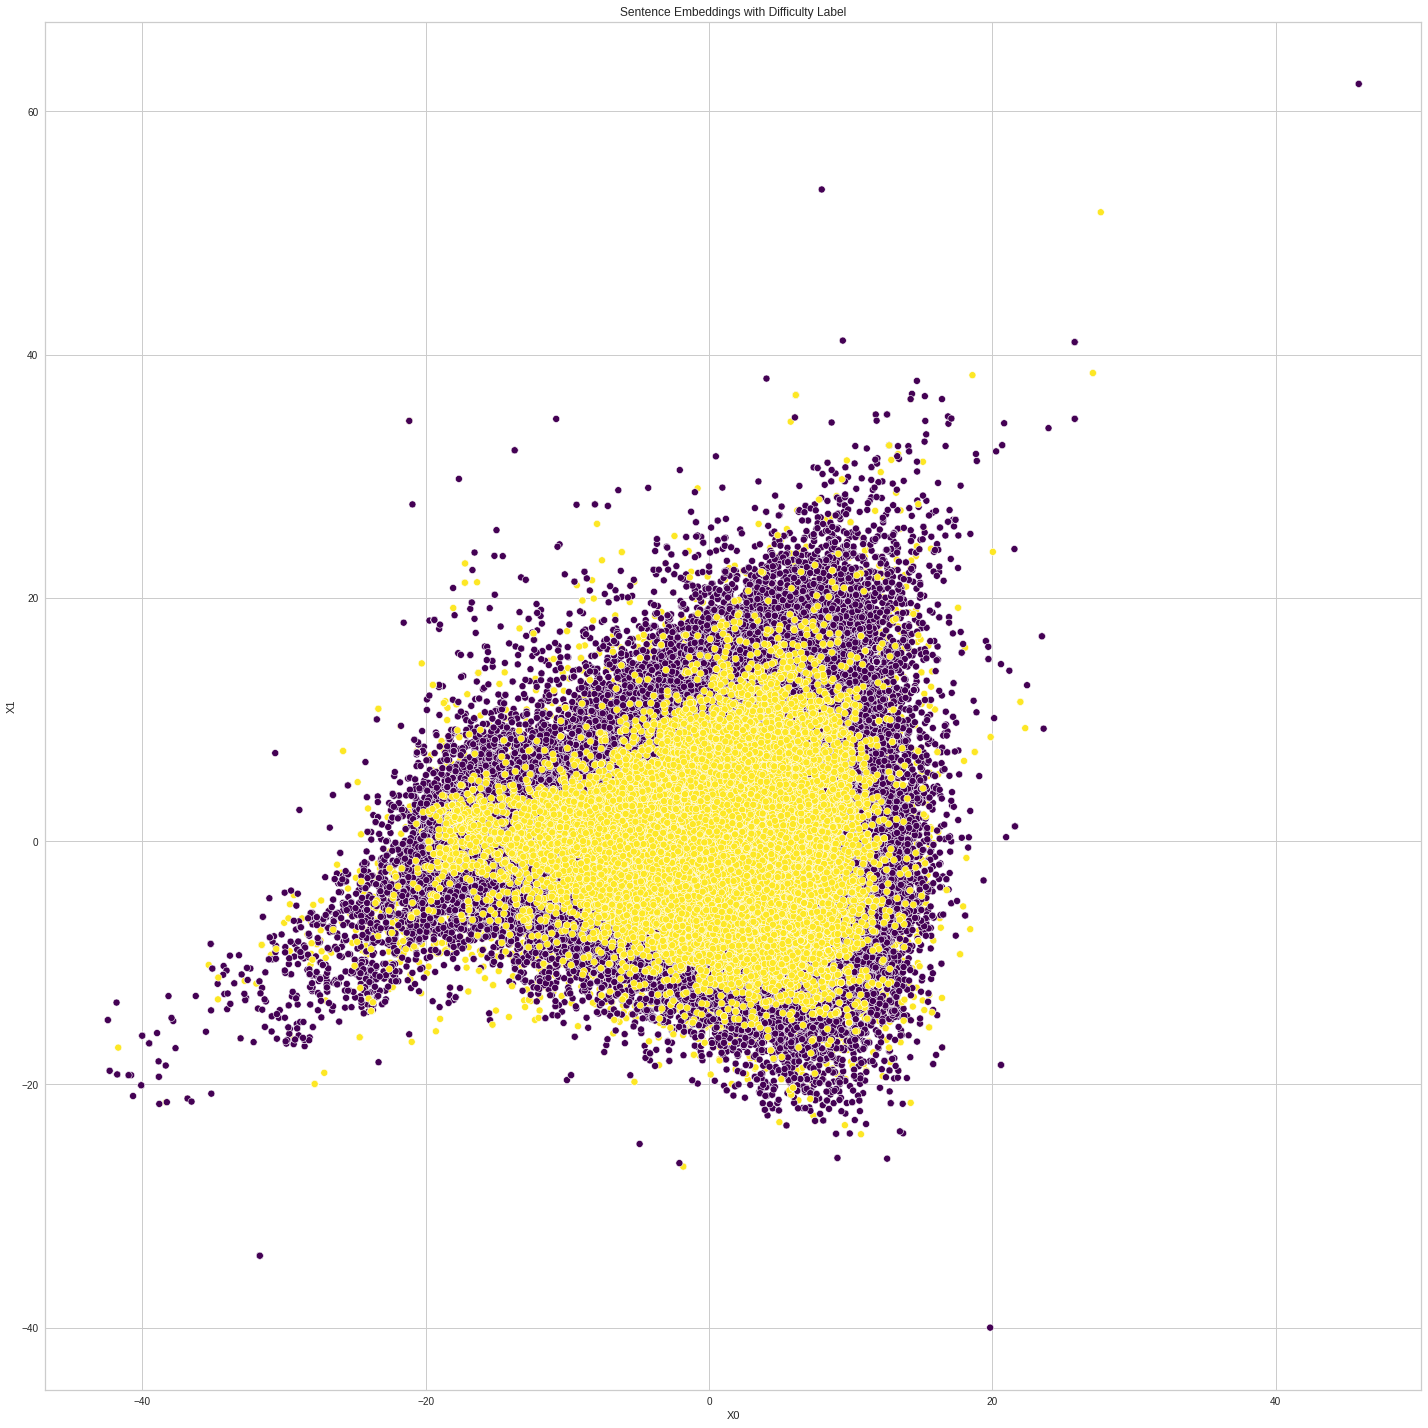

In [39]:
plt.figure(figsize=(20,20))
plt.title("Sentence Embeddings with Difficulty Label")
plt.xlabel('X0')
plt.ylabel('X1')
sns.scatterplot(x=X_pca[:,0],
                y=X_pca[:,1],
                c=new_df.label,s=50, cmap='viridis');
plt.tight_layout()
plt.savefig('drive/Shareddrives/Milestone 2/All_traing_scatter.png',dpi=900)

In [ ]:
plt.tight_layout() 